In [27]:
# Initialize Otter
import otter
grader = otter.Notebook("cs109a_hw1.ipynb")

<h1 style="padding-top: 25px;padding-bottom: 25px;text-align: left; padding-left: 10px; background-color: #DDDDDD; 
    color: black;"> <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science </h1>

## Homework 1: Web Scraping, Data Parsing, and EDA

**Harvard University**<br/>
**Fall 2022**<br/>
**Instructors**: Pavlos Protopapas and Natesh Pilai



<hr style='height:2px'>

In [28]:
## RUN THIS CELL TO GET THE RIGHT FORMATTING 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

#### Instructions
- To submit your assignment follow the instructions given in Canvas.
- Exercise **responsible scraping**. Web servers can become slow or unresponsive if they receive too many requests from the same source in a short amount of time. Use a delay of 2 seconds between requests in your code.  
- Web scraping requests can take several minutes. This is another reason why you should not wait until the last minute to do this homework.
- Plots should be legible and interpretable without having to refer to the code that generated them.
- When asked to interpret a visualization, do not simply describe it (e.g., "the curve has a steep slope up"), but instead explain what you think the plot *means*.
- The use of 'hard-coded' values to try and pass tests rather than solving problems programmatically will not receive credit.
- The use of *extremely* inefficient or error-prone code (e.g., copy-pasting nearly identical commands rather than looping) may result in only partial credit.
- Enable scrolling output on cells with very long output.
- Feel free to add additional code or markdown cells.
- Ensure your code runs top to bottom without error and passes all tests by restarting the kernel and running all cells. This is how the notebook will be evaluated (this can take a few minutes)

In [29]:
import json
from time import sleep
import re
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import HTML
import matplotlib.pyplot as plt

<hr style='height:2px'>

## ⭐ Follow the stars in IMDb's list of "The Top 100 Stars for 2021" 

### Overview
In this assignment you'll practice scraping, parsing, and analyzing HTML data pulled from web.

Specifically, you'll extract information about each person on IMDb's list of "Top 100 Stars for 2021" (https://www.imdb.com/list/ls577894422/), perform some EDA, ask some questions of the data, and interpret your findings.

For example, we might like to know: 
- What is the relationship between when a performer started their career and their total number of acting credits? 
- How many stars started as child actors?
- How do the distribution of ages compare across genders?
- Who is the most prolific actress or actor in IMDb's list of the Top 100 Stars for 2021? 

These questions and more are addressed in details below. 

## Part 1 - Scraping and Parsing

<div class='exercise'><b>Q1 - Scrape Top Stars List</b></div>

Scrape the HTML from the webpage of the "Top 100 Stars for 2021" (https://www.imdb.com/list/ls577894422/) into a `requests` object and name it `my_page`. 

_Points:_ 2.5

In [30]:
url = 'https://www.imdb.com/list/ls577894422/'
my_page = requests.get(url)

In [31]:
grader.check("q1")

q1 results: All test cases passed!

In [32]:
# Successful status code = 200
my_page.status_code

200

In [33]:
raw_html = my_page.text
print(raw_html[:5000])




<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         

        <meta charset="utf-8">




        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
        <title>Top 100 Stars of 2021 - IMDb</title>
  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>

        <link rel="canonical" href="https://www.imdb.com/list/ls577894422/" />
        <meta property="og:url" content="http://ww

<div class='exercise'><b>Q2 - Making BeautifulSoup</b></div>

Create a Beautiful Soup object named `star_soup` from the HTML content in `my_page`.


_Points:_ 2.5

In [34]:
star_soup = BeautifulSoup(raw_html, 'html.parser')

In [35]:
# check your code - you should see a familiar HTML code
print (star_soup.prettify()[:10000])

# prettify formats html string w/ indentation for ease of reading

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Top 100 Stars of 2021 - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
  </script>
  <link href="https://www.imdb.com/list/ls577894422/" rel="canonical"/>
  <meta content="http://www.imdb.com/list/ls577894422/" property="og

In [36]:
grader.check("q2")

q2 results: All test cases passed!

<div class='exercise'><b>Q3 - Parse Stars</b></div>

Write a function called `parse_stars` that accepts `star_soup` as its input and returns a list of dictionaries to be saved in a variable called `star_list` (see function definition below for details)

IMDb star pages do not have a 'sex' or 'gender' field. Some roles are gender neutral (e.g., "writer") and relying on actor/actress distinctions will also give results inconsistent with the more detailed data available on the site. You should infer gender based on the frequency of the personal pronouns used in each star's truncated bio that appears on the main "Top 100 Star of 2021" page.

You may find a data structure like this useful:

```python
pronouns = {'woman': ['she','her'],
            'man': ['he', 'him', 'his'],
            'non-binary': ['they', 'them', 'their']}
```

Simply count the occurrences of the different pronouns in the bio and make the classification based on the grouping with the majority count.

>**Hint:** Throughout this assignment you will likely find it useful to create small 'helper' functions which are then used by your larger functions like `parse_stars`

```
Function
--------
parse_stars

Input
------
star_soup: the soup object with the scraped page
   
Returns
-------
a list of dictionaries; each dictionary corresponds to a star profile and has the following data:

    name: (str) the name of the star
    role: (str) role in film designated on top 100 page (e.g., 'actress', 'writer')
    gender: (str) 'man', 'woman', or 'non-binary' based in pronoun counts in top 100 page bio
    url: (str) the url of the link under star's name that leads to a page with more details
    page: (bs4.BeautifulSoup) BS object acquired by scraping and parsing the above 'url' page

Example:
--------
{'name': 'Elizabeth Olsen',
 'role': 'actress',
 'gender': 'woman',
 'url': 'https://www.imdb.com/name/nm0647634',
 'page': <!DOCTYPE html>
 <html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
 <meta charset="utf-8"/>
 <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
 <script>
 ...
}

```

_Points:_ 25

In [37]:
### Module test

# find right section ('h3')
list_100 = star_soup.select('h3 a')
# list_100[-10:]
# len(list_100)

item = list_100[1]
print(item)
HTML(item.prettify())
# print(star_soup.select('p'))

<a href="/name/nm2074546"> Regé-Jean Page
</a>


In [38]:
p_list = star_soup.select('p')
# list_100[-10:]
print (len(p_list[1:201]))

p_list_200 = p_list[1:201]
for item in p_list_200[:1]:
    print(item.get_text())

200

                        Actress |
 Martha Marcy May Marlene
 


In [39]:
# finding role
role_list = star_soup.select('p:nth-of-type(odd)')
# list_100[-10:]
role_list = role_list[:100]
print(len(role_list[:100]))

# p_list_200 = p_list[1:201]

# desc_100 = []
for item in role_list[-3:]:
    # print(item)
    print(item.get_text())

100

                        Actor |
 The Matrix
 

                        Actor |
 Million Dollar Baby
 

                        Actress |
 Virgin River
 


In [40]:
info_list = star_soup.select('p:nth-of-type(even)')
# list_100[-10:]
print(len(info_list))

# p_list_200 = p_list[1:201]

# desc_100 = []
for item in info_list[:3]:
    # print(item)
    print(item.get_text())

100

Elizabeth Chase "Lizzie" Olsen (born February 16, 1989) is an American actress. She is known for her roles in the films Silent House (2011), Liberal Arts (2012), Godzilla (2014), Avengers: Age of Ultron (2015), and Captain America: Civil War (2016). For her role in the critically-acclaimed Martha ...                

Regererai Page better known by his stage name Regé-Jean Page is an actor and advocate for wanting to break down the boundaries of what is considered normal and do away with labels - gay, straight, brown, white. He had his breakout performance in 2020 as 'Simon Basset, the Duke of Hastings' in ...                

Florence Pugh is an English actress. She is known for Midsommar (2019), Little Women (2019), her MCU debut Black Widow (2021), and Fighting with My Family (2019).Pugh made her film debut in The Falling (2014). She also appears in Lady Macbeth (2016), Outlaw King (2018), Malevolent (2018), and the ...                


In [41]:
# Initialize dictionary for every list item
# name: (str) the name of the star
# role: (str) role in film designated on top 100 page (e.g., 'actress', 'writer')
# gender: (str) 'man', 'woman', or 'non-binary' based in pronoun counts in top 100 page bio
# url: (str) the url of the link under star's name that leads to a page with more details
# page: (bs4.BeautifulSoup) BS object acquired by scraping and parsing the above 'url' page

dict_100 = dict()
head_100 = star_soup.select('h3 a')
role = star_soup.select('p:nth-of-type(odd)')
role_100 = role[:100]
info_100 = star_soup.select('p:nth-of-type(even)')

def get_imdb_url(url):
    return 'https://www.imdb.com' + str(url)

def get_page(url):
    page = requests.get(url)
    # print(page.status_code)
    raw_html = page.text
    return BeautifulSoup(raw_html, 'html.parser')

def get_role(role_100_item):
    # the role is the first item in the cleaned string
    return (role_100_item.get_text().strip().split(' '))[0]

def get_gender(info_100_item):
    pronouns = {'woman': ['she','her', 'hers'],
            'man': ['he', 'him', 'his'],
            'non-binary': ['they', 'them', 'their', 'theirs']}
    
    word_list = info_100_item.get_text().strip().split(' ')
    # print(word_list)
    
    gender = {'woman': 0,
              'man': 0,
              'non-binary': 0}
    
    for word in word_list:
        if (word in pronouns['woman']):
            gender['woman'] = gender.get('woman', 0) + 1
        elif (word in pronouns['man']):
            gender['man'] = gender.get('man', 0) + 1
        elif (word in pronouns['non-binary']):
            gender['non-binary'] = gender.get('non-binary', 0) + 1
    
    return max(gender, key = gender.get)

# parse url at every list
for i in range(3):
    name = head_100[i].text.strip()
    print(name)
    
    url = get_imdb_url(head_100[i].get('href'))
    print(url)
    
    page = get_page(url)    
    # print(page)
    
    role = get_role(role_100[i])
    print(role)
    
    gender = get_gender(info_100[i])
    print(gender)

Elizabeth Olsen
https://www.imdb.com/name/nm0647634
Actress
woman
Regé-Jean Page
https://www.imdb.com/name/nm2074546
Actor
man
Florence Pugh
https://www.imdb.com/name/nm6073955
Actress
woman


In [42]:
# INPUT: star_soup
# OUTPUT: returns a list of dictionaries to be saved in a variable called star_list (see function definition below for details)

def parse_stars(star_soup) -> list:
    
    # parse text to find the right sections
    head_100 = star_soup.select('h3 a')
    role = star_soup.select('p:nth-of-type(odd)')
    role_100 = role[:100]
    info_100 = star_soup.select('p:nth-of-type(even)')
    
    # initialize empty list
    list_100 = []
    
    for i in range(100):
        name = head_100[i].text.strip()
        url = get_imdb_url(head_100[i].get('href'))
        page = get_page(url)    
        role = get_role(role_100[i])
        gender = get_gender(info_100[i])
        

        # print(name)
        # print(role)
        # print(gender)
        # print(url)
        # print(page)
        
        d = {'name': name,
             'role': role,
             'gender': gender,
             'url': url,
             'page': page}
        
        list_100.append(d)
    
    print(len(list_100))
    print(list_100[-3:])
    return list_100
        
star_list = parse_stars(star_soup)

100
[{'name': 'Keanu Reeves', 'role': 'Actor', 'gender': 'woman', 'url': 'https://www.imdb.com/name/nm0000206', 'page': 
<!DOCTYPE html>

<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Keanu Reeves - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.imdb.com/name/nm0000206/" rel="canonical"/>
<meta c

In [43]:
# check your code
# this list is large because of the html code into the `page` field
# to get a better picture, print only the first element
star_list[0]

{'name': 'Elizabeth Olsen',
 'role': 'Actress',
 'gender': 'woman',
 'url': 'https://www.imdb.com/name/nm0647634',
 'page': 
 <!DOCTYPE html>
 
 <html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
 <meta charset="utf-8"/>
 <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
 <script>
     if (typeof uet == 'function') {
       uet("bb", "LoadTitle", {wb: 1});
     }
 </script>
 <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
 <title>Elizabeth Olsen - IMDb</title>
 <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
 <script>
     if (typeof uet == 'function') {
       uet("be", "LoadTitle", {wb: 1});
     }
 </script>
 <script>
     if (typeof uex == 'function') {
       uex("ld", "LoadTitle", {wb: 1});
     }
 </script>
 <link href="https://www.imdb.com/name/nm064

In [44]:
grader.check("q3")

q3 results: All test cases passed!

<div class='exercise'><b>Q4 - Create Star Table</b></div>

Write a function called `create_star_table`, which takes `star_list` as an input and returns a *new* list of dictionaries, `star_table`, which includes more extensive information about each star extracted from their `page`. 

See function the definition below for more details.

>**Note:** The years of some credits are ranges (e.g., 2001-2002). You should use only the starting year.

>**Hint:** Carefuly note the ordering, case, and data type of the values in each dictionary.

```
Function
--------
create_star_table

Input
------
star_list (list of dictionaries)
   
Returns
-------

a list of dictionaries; each dictionary corresponds to a star profile and has the following data:

    name: (str) the name of the star
    role: (str) 'actor', 'actress', 'writer', etc. (note the case)
    gender: (str) 'woman', 'man', or 'non-binary' (based on pronouns in bio)  
    year_born : (int) year star was born (some pages do note have a full date so we'll just use year)
    first_credit: (str) title of their first credit in their capacity designated by 'role'
    year_first_credit: (int) the year they made their first movie or TV show
    num_credits: (int) number of movies or TV shows they have made over their career in their capacity designated by 'role'
    
--------
Example:

{'name': 'Elizabeth Olsen',
  'role': 'actress',
  'gender': 'woman',
  'year_born': 1989,
  'first_credit': 'How the West Was Fun',
  'year_first_credit': 1994,
  'num_credits': 27}
  
```

_Points:_ 25

In [482]:
def get_year_born(star):
    page = star.get('page')
    for i in page.find_all('time'):
        if i.has_attr('datetime'):
            return i['datetime'].split('-')[0]

def get_credits(star):
    page = star.get('page') # soup obecj
    role = star.get('role').lower()
    # list = page.select('div.filmo-category-section b') # outputs movie title
    # list = page.select('div.filmo-category-section div span') # outputs year
    # list = page.find(id='filmography') # gets parent of the list, but too generic
    role_list = list(page.find(id=f'filmo-head-{role}').next_sibling.next_sibling)
    first_role = role_list[-2]
    # print(first_role)
    
    first_credit = (first_role.select_one('b').text.strip())
    year_first_credit = (first_role.select_one('span').text.strip())
    num_credits = int((len(role_list) - 1)/2) 
    
    return first_credit, year_first_credit, num_credits

In [483]:
def create_star_table(star_list: list) -> list:
    
    table_100 = []
    for star in star_list:
        first_credit, year_first_credit, num_credits = get_credits(star)
        d = {'name': star.get('name'),
             'role': star.get('role').lower(),
             'gender': star.get('gender'),
             'year_born': get_year_born(star),
             'first_credit': first_credit,
             'year_first_credit': year_first_credit,
             'num_credits': num_credits
        }
        
        # print(d)
        table_100.append(d)
    
    print(len(table_100))
    return table_100

In [486]:
star_table = create_star_table(star_list)

100


In [487]:
# check your code
star_table

[{'name': 'Elizabeth Olsen',
  'role': 'actress',
  'gender': 'woman',
  'year_born': '1989',
  'first_credit': 'How the West Was Fun',
  'year_first_credit': '1994',
  'num_credits': 26},
 {'name': 'Regé-Jean Page',
  'role': 'actor',
  'gender': 'man',
  'year_born': '1988',
  'first_credit': 'Gimme 6',
  'year_first_credit': '2001',
  'num_credits': 20},
 {'name': 'Florence Pugh',
  'role': 'actress',
  'gender': 'woman',
  'year_born': '1996',
  'first_credit': 'The Falling',
  'year_first_credit': '2014',
  'num_credits': 28},
 {'name': 'Ana de Armas',
  'role': 'actress',
  'gender': 'woman',
  'year_born': '1988',
  'first_credit': 'Una rosa de Francia',
  'year_first_credit': '2006',
  'num_credits': 32},
 {'name': 'Yvonne Strahovski',
  'role': 'actress',
  'gender': 'woman',
  'year_born': '1982',
  'first_credit': 'Double the Fist',
  'year_first_credit': '2004',
  'num_credits': 39},
 {'name': 'Anya Taylor-Joy',
  'role': 'actress',
  'gender': 'woman',
  'year_born': '1996

In [488]:
grader.check("q4")

q4 results: All test cases passed!

### 💡 Saving and Restoring Our List of Dictionaries

It's good practice to save your data structure to disk once you've done all of your scraping. This way you can often avoid repeating all the HTTP requests which can be slow (and taxing on servers!).

We had to wait until this stage to save our data structure as the `bs4.BeautifulSoup` object in our original `star_list` (the `page` values) can not be easily [serialized](https://docs.python-guide.org/scenarios/serialization/).

The code provided below will save the data structure to a [JSON](https://www.json.org/json-en.html) file named `starinfo.json` in the data subdirectory.

In [489]:
# your code here
with open("data/starinfo.json", "w") as f:
    json.dump(star_table, f)

To confirm this worked as intended, open the JSON file and load its contents into a variable for viewing.

In [491]:
with open("data/starinfo.json", "r") as f:
    star_table = json.load(f)
    
# output should be the same
star_table

[{'name': 'Elizabeth Olsen',
  'role': 'actress',
  'gender': 'woman',
  'year_born': '1989',
  'first_credit': 'How the West Was Fun',
  'year_first_credit': '1994',
  'num_credits': 26},
 {'name': 'Regé-Jean Page',
  'role': 'actor',
  'gender': 'man',
  'year_born': '1988',
  'first_credit': 'Gimme 6',
  'year_first_credit': '2001',
  'num_credits': 20},
 {'name': 'Florence Pugh',
  'role': 'actress',
  'gender': 'woman',
  'year_born': '1996',
  'first_credit': 'The Falling',
  'year_first_credit': '2014',
  'num_credits': 28},
 {'name': 'Ana de Armas',
  'role': 'actress',
  'gender': 'woman',
  'year_born': '1988',
  'first_credit': 'Una rosa de Francia',
  'year_first_credit': '2006',
  'num_credits': 32},
 {'name': 'Yvonne Strahovski',
  'role': 'actress',
  'gender': 'woman',
  'year_born': '1982',
  'first_credit': 'Double the Fist',
  'year_first_credit': '2004',
  'num_credits': 39},
 {'name': 'Anya Taylor-Joy',
  'role': 'actress',
  'gender': 'woman',
  'year_born': '1996

This method of saving and restoring data structures will likely be useful to you in the future!

## Part 2 - Pandas and EDA

<div class='exercise'><b>Q5 - Creating a DataFrame</b></div>

For the sake of consistency, we've provide our own JSON file, `data/starinfo_2021_staff.json`, which you should use for the rest of the notebook. Load the contents of this JSON file and use it to create a Pandas DataFrame called `frame`. 

>**Hint:** Remember, the data structure in the JSON file is a list of dictionaries.

_Points:_ 2.5

In [492]:
frame = pd.read_json("data/starinfo_2021_staff.json")

In [493]:
# Take a peek
frame.head(20)

,name,role,gender,year_born,first_credit,year_first_credit,num_credits
0,Elizabeth Olsen,actress,woman,1989,How the West Was Fun,1994,27
1,Regé-Jean Page,actor,man,1988,Gimme 6,2001,20
2,Florence Pugh,actress,woman,1996,The Falling,2014,28
3,Ana de Armas,actress,woman,1988,Una rosa de Francia,2006,32
4,Yvonne Strahovski,actress,woman,1982,Double the Fist,2004,39
5,Anya Taylor-Joy,actress,woman,1996,Vampire Academy,2014,32
6,Alexandra Daddario,actress,woman,1986,All My Children,2002,62
7,Jodie Comer,actress,woman,1993,The Royal Today,2008,34
8,Ben Barnes,actor,man,1981,The Kooks: The Sofa Song,2005,37
9,Lily James,actress,woman,1989,Just William,2010,35


In [494]:
grader.check("q5")

q5 results: All test cases passed!

<div class='exercise'><b>Q6 - Creating a New Column</b></div>

Add a new column to your dataframe with the *approximate* age of each star at the time of their first credit. Name this new column `age_at_first_credit`.

>**NOTE:** We say *approximate* age because we've only collected the year of birth as several star pages do not include a full birth date. **The approximate age of a star in a given year should be the difference between that year and the star's birth year.**

_Points:_ 2.5

In [495]:
frame['age_at_first_credit'] = frame['year_first_credit'] - frame['year_born']

In [497]:
# You should visually inspect some of your results
frame.head()

,name,role,gender,year_born,first_credit,year_first_credit,num_credits,age_at_first_credit
0,Elizabeth Olsen,actress,woman,1989,How the West Was Fun,1994,27,5
1,Regé-Jean Page,actor,man,1988,Gimme 6,2001,20,13
2,Florence Pugh,actress,woman,1996,The Falling,2014,28,18
3,Ana de Armas,actress,woman,1988,Una rosa de Francia,2006,32,18
4,Yvonne Strahovski,actress,woman,1982,Double the Fist,2004,39,22


<div class='exercise'><b>Q7 - Subsetting and Sorting</b></div>

In this section you'll subset and sort the DataFrame to answer a pair of questions:

<div class='exercise'><b>Q7.1 - Child Stars</b></div>

Which stars received their first credit **before the age of 11?**

Store the resulting dataframe as `child_stars`sorted by `age_at_first_credit` in **ascending** order.\
Store the number of such "child stars" in `num_child_stars`.

_Points:_ 2.5

In [504]:
child_stars = frame[frame['age_at_first_credit'] < 11]
child_stars = child_stars.sort_values(by = ['age_at_first_credit'])
num_child_stars = len(child_stars)

print ("{} stars received their first credit before the age of 11.".format(num_child_stars))
display(child_stars)

14 stars received their first credit before the age of 11.


,name,role,gender,year_born,first_credit,year_first_credit,num_credits,age_at_first_credit
33,Kate Beckinsale,actress,woman,1973,Couples,1975,54,2
86,Peyton List,actress,woman,1998,As the World Turns,2002,62,4
0,Elizabeth Olsen,actress,woman,1989,How the West Was Fun,1994,27,5
75,Leonardo DiCaprio,actor,woman,1974,Romper Room,1979,46,5
95,Soleil Moon Frye,actress,woman,1976,Missing Children: A Mother's Story,1982,60,6
31,Mckenna Grace,actress,woman,2006,The Goodwin Games,2013,66,7
80,Jacob Tremblay,actor,man,2006,Motive,2013,40,7
17,Alexander Skarsgård,actor,man,1976,Ake and His World,1984,70,8
40,Angourie Rice,actress,woman,2001,Hidden Clouds,2009,26,8
50,Shailene Woodley,actress,woman,1991,Replacing Dad,1999,41,8


In [506]:
grader.check("q7.1")

q7.1 results: All test cases passed!

<div class='exercise'><b>Q7.2 - Late Bloomers</b></div>

Which stars received their first credit at **26-years-old or older?**

Store the resulting dataframe as `late_bloomers`sorted by `age_at_first_credit` in **descending** order.\
Store the number of such "late bloomers" in `num_late_bloomers`.

_Points:_ 2.5

In [510]:
late_bloomers = frame[frame['age_at_first_credit'] >= 26].sort_values(by=['age_at_first_credit'],ascending=False)
num_late_bloomers = len(late_bloomers)

print ("{} stars received their first credit at 26 or older.".format(num_late_bloomers))
display(late_bloomers)

4 stars received their first credit at 26 or older.


,name,role,gender,year_born,first_credit,year_first_credit,num_credits,age_at_first_credit
22,Hannah Waddingham,actress,woman,1974,Coupling,2002,37,28
89,Jean Smart,actress,woman,1951,Before and After,1979,124,28
96,Taika Waititi,writer,man,1975,John & Pogo,2002,28,27
83,Julianne Nicholson,actress,woman,1971,Nothing Sacred,1997,64,26


In [511]:
grader.check("q7.2")

q7.2 results: All test cases passed!

<div class='exercise'><b>Q8 - Visualization  </b></div>

In this section you'll use your Python visualization skills to further explore the data:

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q8.1  - Exploring Trends</b></div>

Create 2 [scatter plots](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html?highlight=scatter#matplotlib.axes.Axes.scatter): one showing the relationship between **age at first movie** and number of credits, the other between **year born** and number of credits.

What can you say about these relationships? Are there any apparent outliers? Please limit your written responses to 4 sentences or fewer.

_Points:_ 5

In plot 1, it seems like there is no apparent relationship beween age at first credit and number of credits. There are 3 outliers with >100 number of credits.

In plot 2, an inverse relationship - later years (younger individuals) have lower number of credits, which makes sense as they are newer in the industry. There are few older (and successful) actors left.

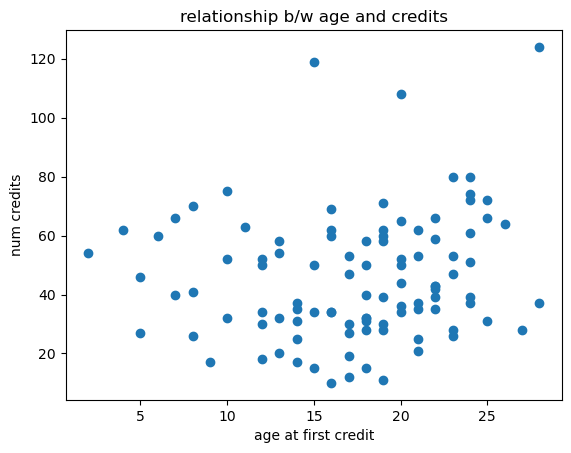

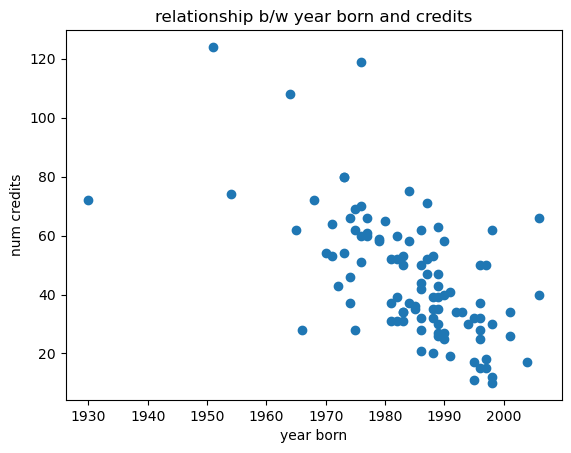

In [518]:
# your code here

# Plot 1
x = frame['age_at_first_credit']
y = frame['num_credits']

plt.scatter(x, y)
plt.title('relationship b/w age and credits')
plt.xlabel('age at first credit')
plt.ylabel('num credits')
plt.show()

# Plot 2
x = frame['year_born']
y = frame['num_credits']

plt.scatter(x, y)
plt.title('relationship b/w year born and credits')
plt.xlabel('year born')
plt.ylabel('num credits')
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q8.2 - Age Distributions</b></div>

Let's look at the distribution of movie and TV performers' ages by gender.

Create two plots, each plot consisting of **two overlayed [histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist)** comparing the distribution of men's current ages to women's current ages.

In the first plot, the distributions should be normalized to show the *proportion* of each gender at each age.

The second plot should show the *counts* of each gender at each age. 

Interpret the resulting plots. (4 sentences or fewer)

>**NOTE 1:** Again, we are dealing with *approximate* ages as defined above.

>**NOTE 2:** You should exclude those whose `role` is not 'actor' or 'actress' from your analysis

_Points:_ 10

In plot 1, there is a higher proportion of older actors than actresses when receiving their first credit. There seems to be a peak age between 17 - 22 where there is a highest proportion of actresses.

In plot 2, it seems like there are more actresses than actresses. There is also a larger range of ages for actresses (~2-28) than actors (~6-25). 

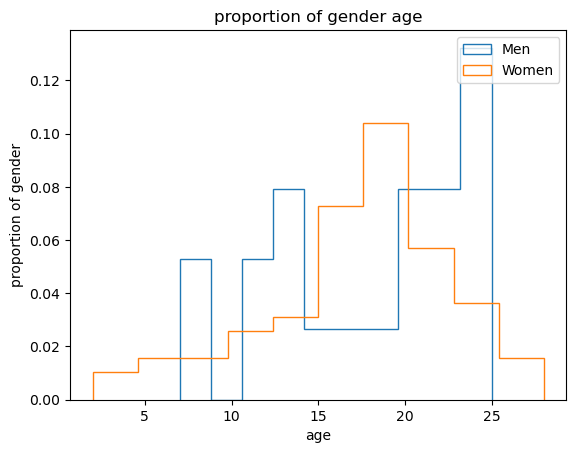

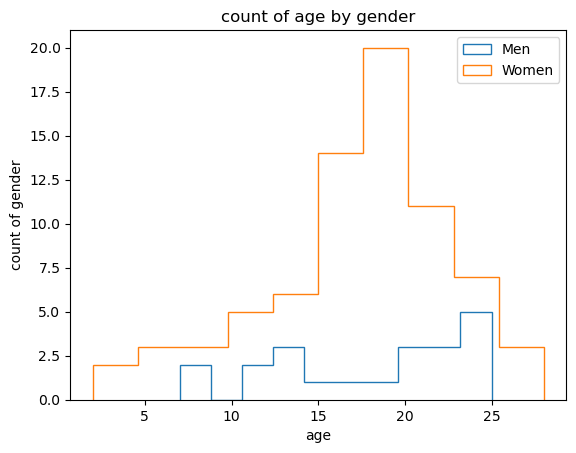

In [572]:
# your code here
# print(len(frame))

men = frame.loc[(frame['gender'] == 'man') & (frame['role'] == 'actor'),]
women = frame.loc[(frame['gender'] == 'woman') & (frame['role'] == 'actress'),]

# print(len(men))
# print(len(women))
# print(men.head(5), women.head(5))

# plot 1
plt.hist(men['age_at_first_credit'], 
         label = 'Men', density=True,histtype='step', stacked=True)
plt.hist(women['age_at_first_credit'], 
         label = 'Women', density=True,histtype='step', stacked=True)
plt.xlabel('age')
plt.ylabel('proportion of gender')
plt.legend(loc='upper right')
plt.title('proportion of gender age')
plt.show()

# plot 2
plt.hist(men['age_at_first_credit'], 
         label = 'Men', histtype='step', stacked=True)
plt.hist(women['age_at_first_credit'], 
         label = 'Women', histtype='step', stacked=True)
plt.xlabel('age')
plt.ylabel('count of gender')
plt.legend(loc='upper right')
plt.title('count of age by gender')
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q8.3 - Credits Per Year</b></div>

Create a [box plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.boxplot.html?highlight=boxplot#matplotlib.axes.Axes.boxplot) or [violin plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.violin.html?highlight=violin#matplotlib.axes.Axes.violin) comparing the **credits-per-year-active** for men and women performers.

Here we assume all stars in the list are still active. 

Do these distributions look the same across genders? Can you identify the stars corresponding to any outliers? Comment on these points and anything else of interest gleaned from your plot. (6 sentences or fewer)

>**NOTE:** Again, you should exclude those whose `role` is not 'actor' or 'actress' from your analysis.

_Points:_ 10

Both genders share the same median credits per year active (CPY), but women have a larger interquartile range. There are 2 outliers for actors - Simu Liu and Jacob Tremblay, and 1 outlier for actress - McKenna Grace. Both Jacob and McKenna received their first credit at 7, but McKenna has the more prolific career. Both genders have a right skew - the mean is higher than the median.

In [573]:
# your code here
men['cred_per_yr'] = men['num_credits']/(2021 - men['year_first_credit'])
women['cred_per_yr'] = women['num_credits']/(2021 - women['year_first_credit'])

/tmp/ipykernel_50/4234264776.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men['cred_per_yr'] = men['num_credits']/(2021 - men['year_first_credit'])
/tmp/ipykernel_50/4234264776.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women['cred_per_yr'] = women['num_credits']/(2021 - women['year_first_credit'])


In [574]:
men.head(5)

,name,role,gender,year_born,first_credit,year_first_credit,num_credits,age_at_first_credit,cred_per_yr
1,Regé-Jean Page,actor,man,1988,Gimme 6,2001,20,13,1.000000
8,Ben Barnes,actor,man,1981,The Kooks: The Sofa Song,2005,37,24,2.312500
17,Alexander Skarsgård,actor,man,1976,Ake and His World,1984,70,8,1.891892
25,Evan Peters,actor,man,1987,Clipping Adam,2004,47,17,2.764706
27,Sebastian Stan,actor,man,1982,71 Fragments of a Chronology of Chance,1994,52,12,1.925926


In [575]:
women.head(5)

,name,role,gender,year_born,first_credit,year_first_credit,num_credits,age_at_first_credit,cred_per_yr
0,Elizabeth Olsen,actress,woman,1989,How the West Was Fun,1994,27,5,1.000000
2,Florence Pugh,actress,woman,1996,The Falling,2014,28,18,4.000000
3,Ana de Armas,actress,woman,1988,Una rosa de Francia,2006,32,18,2.133333
4,Yvonne Strahovski,actress,woman,1982,Double the Fist,2004,39,22,2.294118
5,Anya Taylor-Joy,actress,woman,1996,Vampire Academy,2014,32,18,4.571429


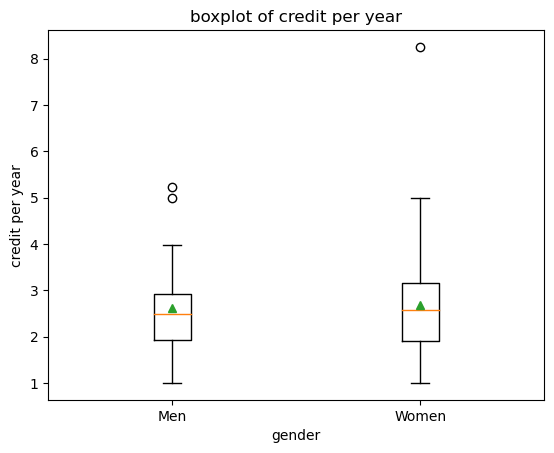

In [592]:
# plot 1
plt.boxplot([men['cred_per_yr'],women['cred_per_yr']], labels=['Men','Women'], showmeans=True)

plt.xlabel('gender')
plt.ylabel('credit per year')
plt.title('boxplot of credit per year')
plt.show()

In [590]:
women_stars = women.sort_values(by=['cred_per_yr'],ascending=False)
display(women_stars)

,name,role,gender,year_born,first_credit,year_first_credit,num_credits,age_at_first_credit,cred_per_yr
31,Mckenna Grace,actress,woman,2006,The Goodwin Games,2013,66,7,8.250000
55,Zendaya,actress,woman,1996,Good Luck Charlie,2011,50,15,5.000000
77,Karen Gillan,actress,woman,1987,Rebus,2006,71,19,4.733333
5,Anya Taylor-Joy,actress,woman,1996,Vampire Academy,2014,32,18,4.571429
84,Teyana Taylor,actress,woman,1990,Teyana Taylor: Google Me,2008,58,18,4.461538
...,...,...,...,...,...,...,...,...,...
94,Jennifer Connelly,actress,woman,1970,Duran Duran: Union of the Snake,1983,54,13,1.421053
16,Phoebe Dynevor,actress,woman,1995,Waterloo Road,2009,17,14,1.416667
41,Meghan Markle,actress,woman,1981,Married... with Children,1995,31,14,1.192308
33,Kate Beckinsale,actress,woman,1973,Couples,1975,54,2,1.173913


In [591]:
men_stars = men.sort_values(by=['cred_per_yr'],ascending=False)
display(men_stars)

,name,role,gender,year_born,first_credit,year_first_credit,num_credits,age_at_first_credit,cred_per_yr
78,Simu Liu,actor,man,1989,Nikita,2012,47,23,5.222222
80,Jacob Tremblay,actor,man,2006,Motive,2013,40,7,5.000000
72,Ryan Reynolds,actor,man,1976,Fifteen,1991,119,15,3.966667
79,Tom Holland,actor,man,1996,The Secret World of Arrietty,2010,37,14,3.363636
66,Tom Hardy,actor,man,1977,Tommaso,2001,61,24,3.050000
97,Keanu Reeves,actor,man,1964,Hangin' In,1984,108,20,2.918919
25,Evan Peters,actor,man,1987,Clipping Adam,2004,47,17,2.764706
62,Tanner Buchanan,actor,man,1998,Modern Family,2010,30,12,2.727273
46,Tom Hiddleston,actor,man,1981,The Life and Adventures of Nicholas Nickleby,2001,52,20,2.600000
74,Daniel Craig,actor,man,1968,The Power of One,1992,72,24,2.482759


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q9 - Most Prolific Stars</b></div>

Make a plot visualizing the number of credits received by each star. Who is the most prolific person in IMDb's list of the Top 100 Stars for 2021? Define **most prolific** as the person with the most credits.

>**Note 1:** Your analysis should include all 100 stars

>**Note 2:** The stars in the plots should be sorted based on number of credits to make the plot easier to read.

_Points:_ 10

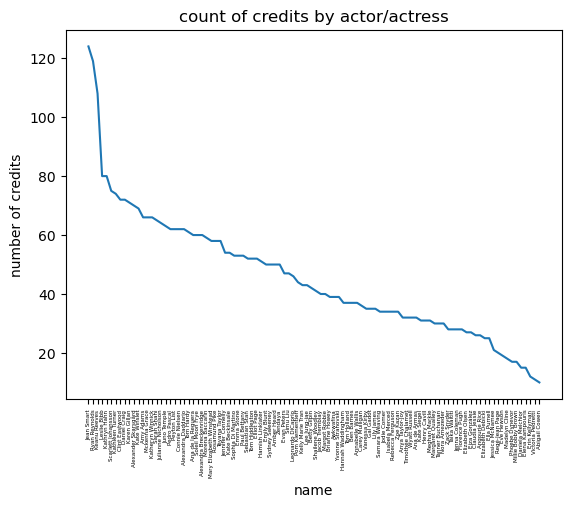

In [599]:
# your code here
frame = frame.sort_values(by=['num_credits'],ascending=False)

y = frame['num_credits']
x = frame['name']

plt.plot(x, y)
plt.xticks(fontsize = 4, rotation = 90)
plt.xlabel('name')
plt.ylabel('number of credits')
plt.title('count of credits by actor/actress')
plt.show()


In [605]:
highest_performer_name = frame['name'][frame['num_credits'].idxmax()]
highest_performer_credits = frame['num_credits'].max()
print ("{} had the most credits with {}".format(highest_performer_name, highest_performer_credits))

Jean Smart had the most credits with 124


<!-- END QUESTION -->

**This concludes HW1. Thank you!**

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [606]:
grader.check_all()

q1 results: All test cases passed!

q2 results: All test cases passed!

q3 results: All test cases passed!

q4 results: All test cases passed!

q5 results: All test cases passed!

q7.1 results: All test cases passed!

q7.2 results: All test cases passed!